In [153]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [154]:
dataset.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [155]:
dataset['date_time'] = pd.to_datetime(dataset['date_time'])

In [156]:
dataset['hours'] = dataset['date_time'].dt.hour


In [157]:
day = dataset[(dataset['hours']>=7)&(dataset['hours']<=19)].copy()

Text(0, 0.5, 'Frequency')

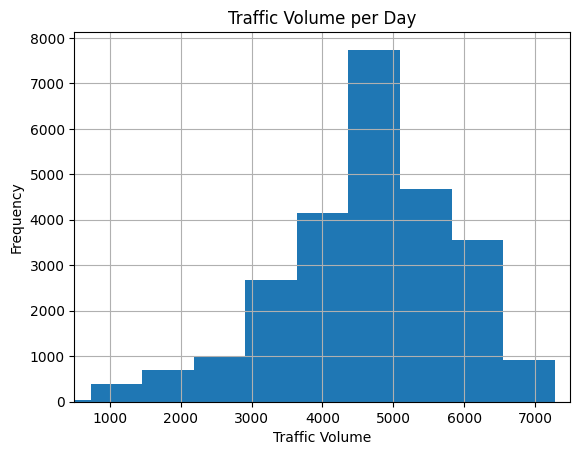

In [158]:
day['traffic_volume'].hist()
plt.xlim(500,7500)
plt.title('Traffic Volume per Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

In [159]:
day['month']=day['date_time'].dt.month
by_month = day.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

Text(0.5, 1.0, 'Mean Day-Time Traffic by month')

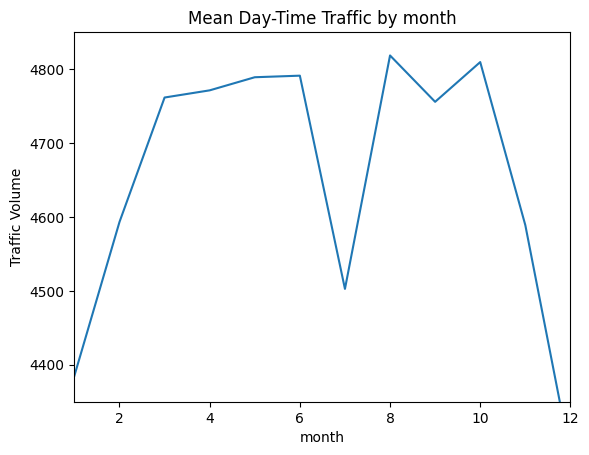

In [160]:
by_month['traffic_volume'].plot.line()
plt.ylim(4350,4850)
plt.xlim(1,12)
plt.ylabel('Traffic Volume')
plt.title('Mean Day-Time Traffic by month')

From now on we will work with a daytime schedule, with little activity at night.

In [161]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume'] 

dayofweek
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

<Axes: xlabel='dayofweek'>

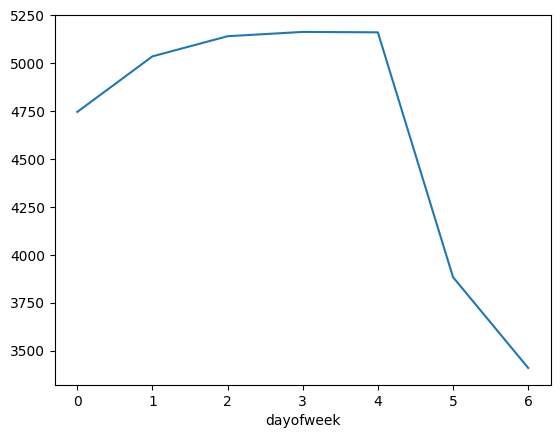

In [162]:
by_dayofweek['traffic_volume'].plot.line()

We need to take the whole week, or better yet, we'll immediately separate the workdays and weekends.

In [163]:
business_days =  day[day['dayofweek'] <= 4].copy()
hourly_business = business_days.groupby('hours').mean(numeric_only=True)

In [164]:
weekend =  day[day['dayofweek'] >= 5].copy()
hourly_weekend = weekend.groupby('hours').mean(numeric_only=True)

Text(0.5, 1.0, 'Weekends')

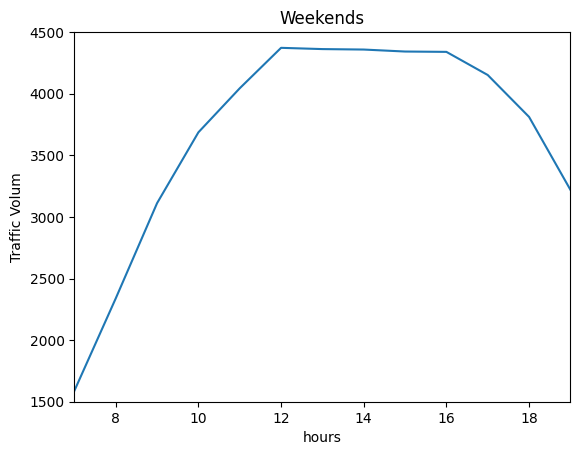

In [165]:
hourly_weekend['traffic_volume'].plot()
plt.ylim(1500,4500)
plt.xlim(7,19)
plt.ylabel('Traffic Volum')
plt.title('Weekends')

Text(0.5, 1.0, 'Work days')

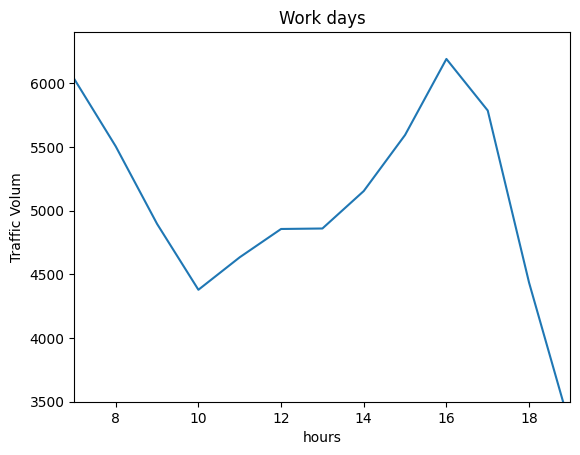

In [166]:
hourly_business['traffic_volume'].plot()
plt.ylim(3500,6400)
plt.xlim(7,19)
plt.ylabel('Traffic Volum')
plt.title('Work days')

On weekdays there is heavy traffic in the morning and after work.   
While on weekends we see little traffic in the middle of the day.

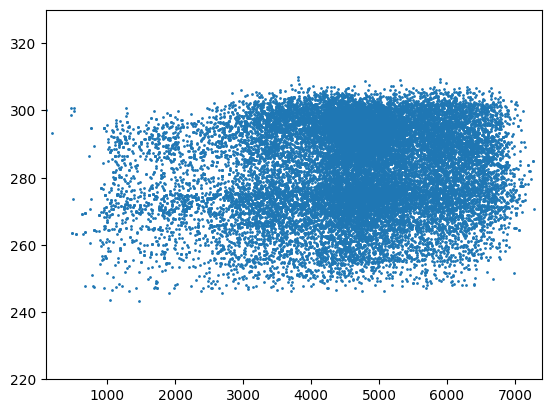

In [167]:
plt.scatter(day['traffic_volume'],day['temp'],s=1)
plt.ylim(220,330)
plt.xlim(100,7400)
plt.show()

In [168]:
temp_corr = day['traffic_volume'].corr(day['temp'])
temp_corr

np.float64(0.11808381454022034)

Based on the analysis, it cannot be said that the temperature of the rink significantly affects the graph

In [169]:
by_weather_main = day.groupby('weather_main').mean(numeric_only=True)
by_weather_description = day.groupby('weather_description').mean(numeric_only=True)

Text(0.5, 1.0, 'Traffic with with Precipitation types')

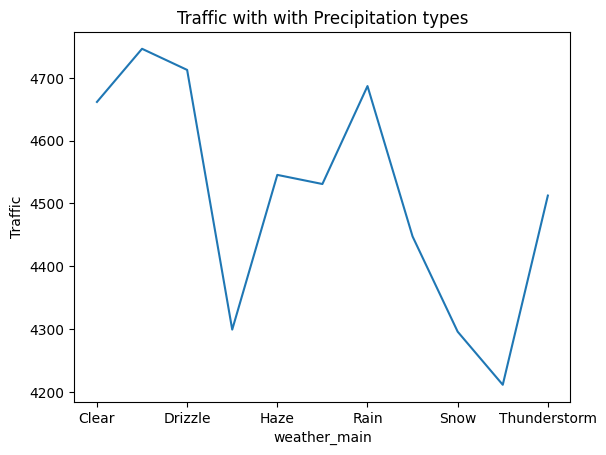

In [180]:
by_weather_main['traffic_volume'].plot()
plt.ylabel('Traffic')
plt.title('Traffic with with Precipitation types')

Text(0.5, 1.0, 'Traffic with weather description')

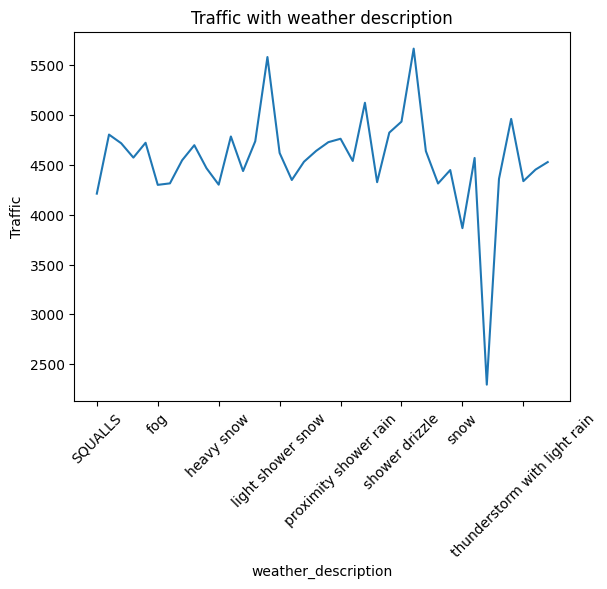

In [179]:
by_weather_description['traffic_volume'].plot()
plt.xticks(rotation=45)
plt.ylabel('Traffic')
plt.title('Traffic with weather description')

lets  try  bilt a bar 


<Axes: ylabel='weather_description'>

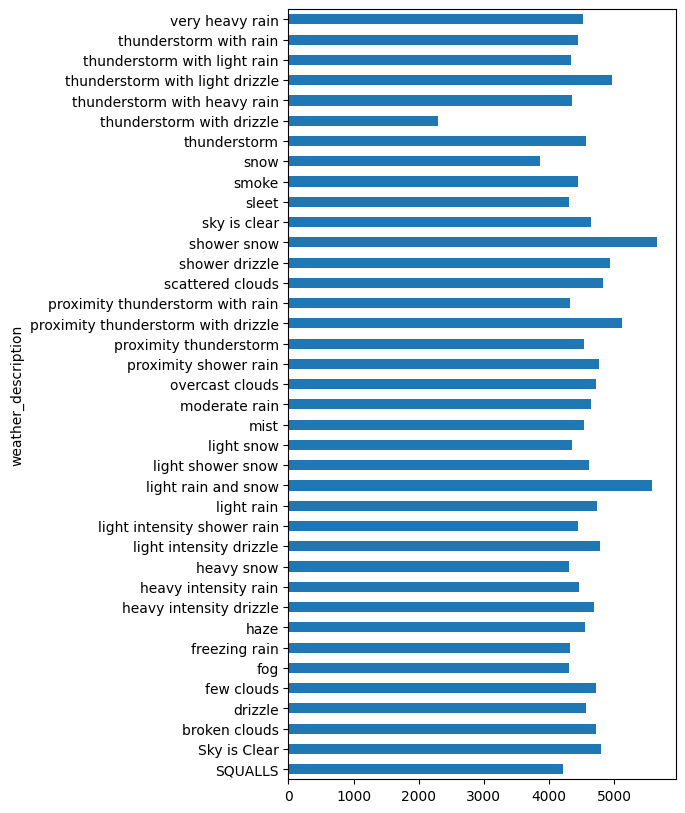

In [182]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))


During snow, rain and sleet there is more traffic, perhaps because fewer people want to walk on bad days